In [21]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline  
#%matplotlib qt
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

In [22]:
images_path = "TP3\images"
template_path = "TP3\\template"


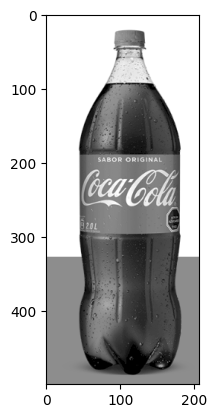

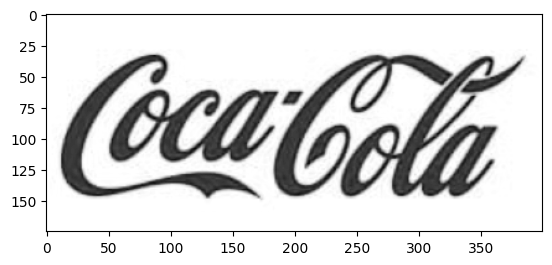

In [23]:
# Grafico el template y 1 imagen
path_img = images_path + '\coca_logo_1.png'
path_template = template_path + '\pattern.png'

img = cv.imread(path_img, cv.IMREAD_GRAYSCALE)
#img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

template = cv.imread(path_template, cv.IMREAD_GRAYSCALE)
#template = cv.cvtColor(template, cv.COLOR_BGR2RGB)

plt.figure()
plt.imshow(img, cmap = 'gray')
plt.show()


plt.figure()
plt.imshow(template, cmap = 'gray')
plt.show()

In [51]:
#Funcion para matchear 1 imagen
def match_1_coke_logo(input_image:np.ndarray, starting_scale):
    #cargo template
    template_path = "TP3\\template"
    path_template = template_path + '\pattern.png'
    template_in = cv.imread(path_template, cv.IMREAD_GRAYSCALE)

    template_filtered = template_in.copy()
    image_filtered = input_image.copy()

    #Aplico filtros
    image_filtered = cv.GaussianBlur(image_filtered, ksize = (3, 3), sigmaX = 1)
    #template_filtered = cv.GaussianBlur(template_filtered, ksize = (3, 3), sigmaX = 1)

    image_filtered = cv.Canny(image_filtered, 200,250, L2gradient = True)
    template_filtered = cv.Canny(template_filtered, 200, 240, L2gradient = True)

    kernel = np.ones((9,9),np.uint8)

    image_filtered = cv.dilate(image_filtered,kernel,iterations = 1)
    template_filtered = cv.dilate(template_filtered,kernel,iterations = 1)

    #image_filtered = cv.GaussianBlur(image_filtered, ksize = (9, 9), sigmaX = 5)
    #template_filtered = cv.GaussianBlur(template_filtered, ksize = (9, 9), sigmaX = 5)
    #template_filtered = cv.dilate(template_filtered,kernel,iterations = 1)

    #image_filtered = cv.erode(image_filtered,kernel,iterations = 3)  

    #ret, image_filtered = cv.threshold(image_filtered, 220, 255, cv.THRESH_BINARY)
    #ret, template_filtered = cv.threshold(template_filtered, 1, 255, cv.THRESH_BINARY)   

    #Hago el matching con escala variable
    height, width = template_filtered.shape
    found = None
    for scale_x in np.linspace(starting_scale, 1.5, 30):
        for scale_y in np.linspace(starting_scale, 1.5, 30):
            dim = (int(width * scale_x), int(height * scale_y))
            resized = cv.resize(template_filtered, dim, interpolation = cv.INTER_AREA)

            if resized.shape[0] > image_filtered.shape[0] or resized.shape[1] > image_filtered.shape[1]:
                #print("Template larger than image")
                break

            if(scale_x / scale_y > 1.3 or scale_x / scale_y < 0.8):
                break            

            result = cv.matchTemplate(image_filtered, resized, cv.TM_SQDIFF_NORMED)
            (min_val, max_val, min_loc, max_loc) = cv.minMaxLoc(result)

            if found is None or min_val < found[0]:
                found = (min_val, min_loc, scale_x, scale_y)
                copy1 = resized.copy()
                copy2 = image_filtered.copy()

    top_left = found[1]
    bottom_right = (top_left[0] + int(width * found[2]), top_left[1] + int(height * found[3]))

    copy = input_image.copy()

    cv.rectangle(copy,top_left, bottom_right, 0, 2)

    print(found)
    plt.figure()
    plt.imshow(copy, cmap = 'gray')
    plt.show()  
    '''
   plt.figure()
    plt.imshow(copy1, cmap = 'gray')
    plt.show()

    plt.figure()
    plt.imshow(copy2, cmap = 'gray')
    plt.show()
    '''

In [130]:
#Funcion para matchear 1 imagen
def match_coke_logo(input_image:np.ndarray, starting_scale):
    #cargo template
    template_path = "TP3\\template"
    path_template = template_path + '\pattern.png'
    template_in = cv.imread(path_template, cv.IMREAD_GRAYSCALE)

    template_filtered = template_in.copy()
    image_filtered = input_image.copy()

    #Aplico filtros
    image_filtered = cv.GaussianBlur(image_filtered, ksize = (3, 3), sigmaX = 1)
    template_filtered = cv.GaussianBlur(template_filtered, ksize = (3, 3), sigmaX = 1)

    image_filtered = cv.Canny(image_filtered, 200,250, L2gradient = True)
    template_filtered = cv.Canny(template_filtered, 200, 240, L2gradient = True)

    kernel = np.ones((15,15),np.uint8)

    image_filtered = cv.dilate(image_filtered,kernel,iterations = 1)
    template_filtered = cv.dilate(template_filtered,kernel,iterations = 1)

    #image_filtered = cv.GaussianBlur(image_filtered, ksize = (9, 9), sigmaX = 5)
    #template_filtered = cv.GaussianBlur(template_filtered, ksize = (9, 9), sigmaX = 5)
    #template_filtered = cv.dilate(template_filtered,kernel,iterations = 1)

    #image_filtered = cv.erode(image_filtered,kernel,iterations = 3)  

    #ret, image_filtered = cv.threshold(image_filtered, 220, 255, cv.THRESH_BINARY)
    #ret, template_filtered = cv.threshold(template_filtered, 1, 255, cv.THRESH_BINARY)   

    #Hago el matching con escala variable
    height, width = image_filtered.shape
    height_f, width_f = template_filtered.shape
    found = None
    out_of_aspect = 0
    out_of_scale = 0
    for scale_x in np.linspace(starting_scale, 5, 10):
        for scale_y in np.linspace(starting_scale, 5, 10):

            if(scale_x / scale_y > 1.3 or scale_x / scale_y < 0.8):
                out_of_aspect = out_of_aspect + 1
            else:
                dim = (int(width * scale_x), int(height * scale_y))
                resized = cv.resize(image_filtered, dim, interpolation = cv.INTER_AREA)

                if template_filtered.shape[0] > resized.shape[0] or template_filtered.shape[1] > resized.shape[1]:
                    out_of_scale = out_of_scale + 1
                else:
                    result = cv.matchTemplate(resized, template_filtered, cv.TM_SQDIFF_NORMED)
                    (min_val, max_val, min_loc, max_loc) = cv.minMaxLoc(result)
                    if found is None or min_val < found[0]:
                        found = (min_val, min_loc, scale_x, scale_y)
                        #copy1 = resized.copy()
                        #copy2 = image_filtered.copy()

    top_left = found[1]
    bottom_right = (top_left[0] + int(width_f * found[2]), top_left[1] + int(height_f * found[3]))

    dim = (int(width * found[2]), int(height * found[3]))
    copy = cv.resize(input_image, dim, interpolation = cv.INTER_AREA)

    cv.rectangle(copy,top_left, bottom_right, 0, 2)

    print(found)
    plt.figure()
    plt.imshow(copy, cmap = 'gray')
    plt.show()  
    '''
   plt.figure()
    plt.imshow(copy1, cmap = 'gray')
    plt.show()

    plt.figure()
    plt.imshow(copy2, cmap = 'gray')
    plt.show()
    '''

In [241]:
#Funcion para matchear 1 imagen
def match_logo(input_image:np.ndarray, starting_scale):
    #cargo template
    template_path = "TP3\\template"
    path_template = template_path + '\pattern.png'
    template_in = cv.imread(path_template, cv.IMREAD_GRAYSCALE)

    template_filtered = template_in.copy()
    image_filtered = input_image.copy()

    #Aplico filtros
    image_filtered = cv.GaussianBlur(image_filtered, ksize = (25, 25), sigmaX = 1)
    #template_filtered = cv.GaussianBlur(template_filtered, ksize = (3, 3), sigmaX = 1)

    image_filtered = cv.Canny(image_filtered, 10,250, L2gradient = True)
    template_filtered = cv.Canny(template_filtered, 200, 240, L2gradient = True)

    kernel = np.ones((3,3),np.uint8)

    image_filtered = cv.dilate(image_filtered,kernel,iterations = 1)
    template_filtered = cv.dilate(template_filtered,kernel,iterations = 2)

    image_filtered = cv.erode(image_filtered,kernel,iterations = 1)  
    #template_filtered = cv.erode(template_filtered,kernel,iterations = 2)

    image_filtered = cv.dilate(image_filtered,kernel,iterations = 2)

    ret, image_filtered = cv.threshold(image_filtered, 10, 255, cv.THRESH_BINARY)
    ret, template_filtered = cv.threshold(template_filtered, 1, 255, cv.THRESH_BINARY)   

    #Hago el matching con escala variable
    height, width = image_filtered.shape
    height_f, width_f = template_filtered.shape
    found = None
    out_of_aspect = 0
    out_of_scale = 0
    
    for scale_x in np.linspace(starting_scale, 2, 10):
        for scale_y in np.linspace(starting_scale, 2, 10):
            if(scale_x / scale_y > 1.3 or scale_x / scale_y < 0.8):
                out_of_aspect = out_of_aspect + 1
            else:  
                dim = (int(width_f * scale_x), int(height_f * scale_y))
                resized = cv.resize(template_filtered, dim, interpolation = cv.INTER_AREA)
                height_r, width_r = resized.shape
                if height_r > height or width_r > width:
                    out_of_scale = out_of_scale + 1
                else:

                    result = cv.matchTemplate(image_filtered, resized, cv.TM_CCORR_NORMED)
                    (min_val, max_val, min_loc, max_loc) = cv.minMaxLoc(result)

                    if found is None or max_val > found[0]:
                        found = (max_val, max_loc, scale_x, scale_y)
                        copy1 = resized.copy()
                        copy2 = image_filtered.copy()
    
    print(image_filtered.shape)
    
    top_left = found[1]
    bottom_right = (top_left[0] + int(width_f * found[2]), top_left[1] + int(height_f * found[3]))

    copy = input_image.copy()

    cv.rectangle(copy,top_left, bottom_right, 0, 2)

    print(found)
    plt.figure()
    plt.imshow(copy, cmap = 'gray')
    plt.show()  
    
    plt.figure()
    plt.imshow(copy1, cmap = 'gray')
    plt.show()

    plt.figure()
    plt.imshow(copy2, cmap = 'gray')
    plt.show()
    

(500, 207)
(0.7235857844352722, (34, 199), 0.4, 0.4)


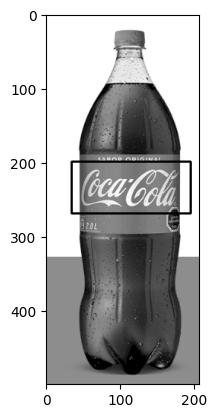

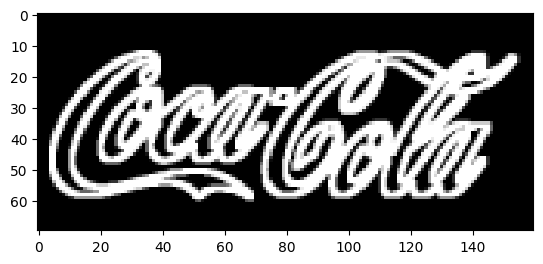

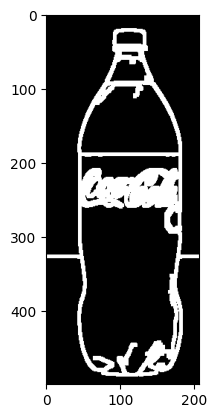

(363, 233)
(0.6278667449951172, (0, 113), 0.5777777777777778, 0.5777777777777778)


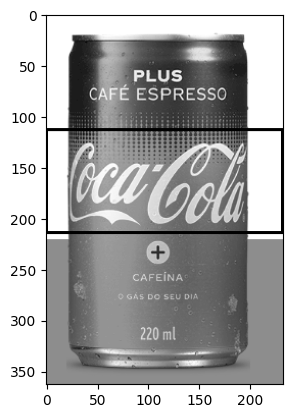

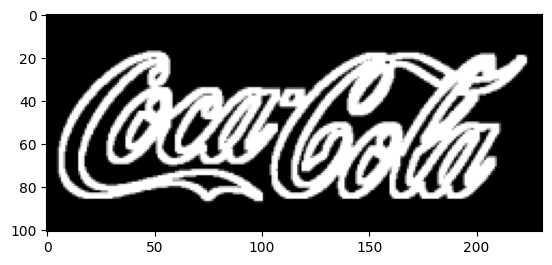

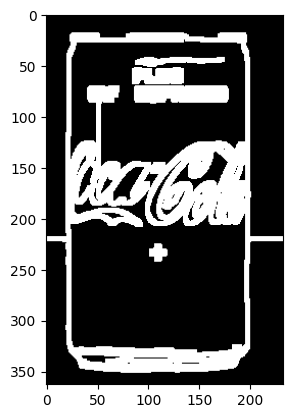

(598, 799)
(0.6130399703979492, (189, 419), 0.4, 0.4)


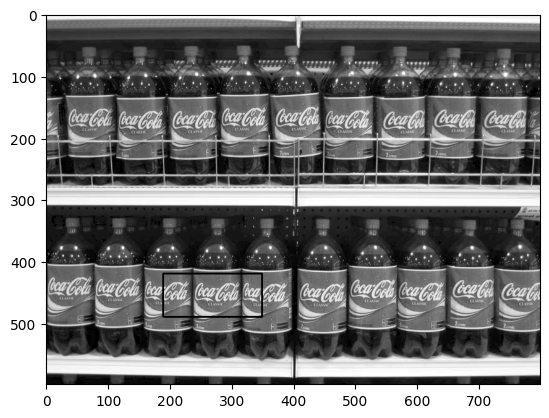

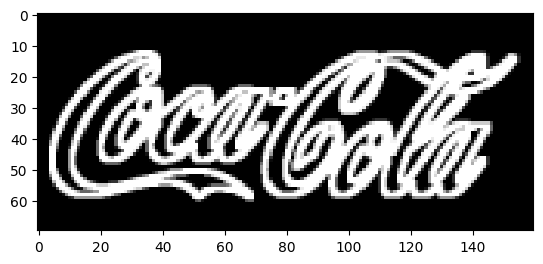

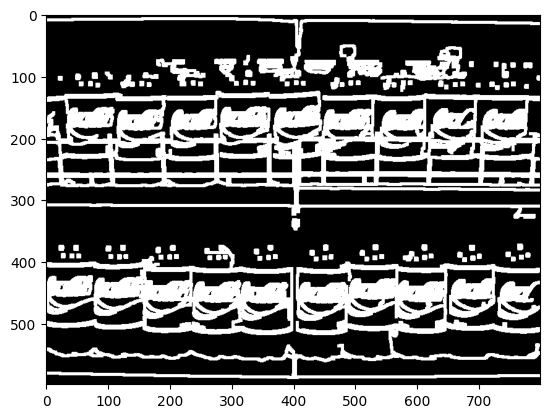

(493, 715)
(0.6326760053634644, (510, 328), 0.4, 0.4)


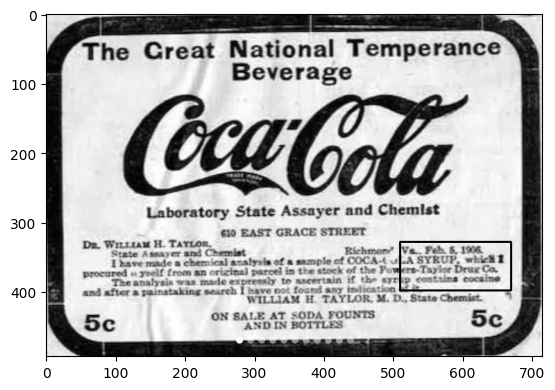

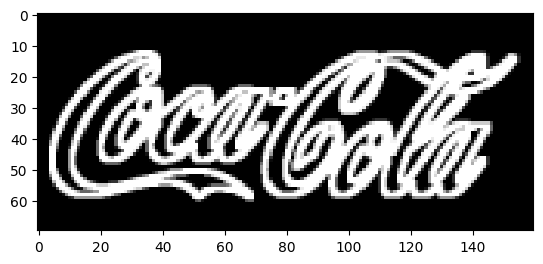

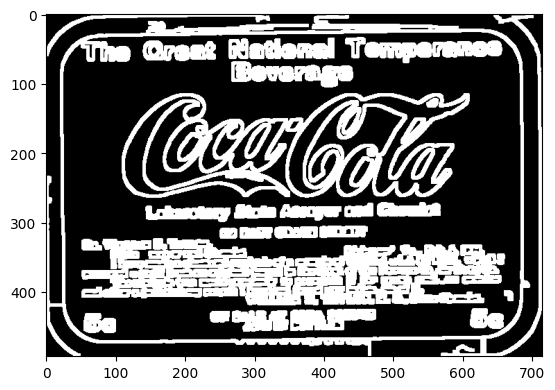

(429, 715)
(0.7790107131004333, (59, 182), 0.4, 0.4)


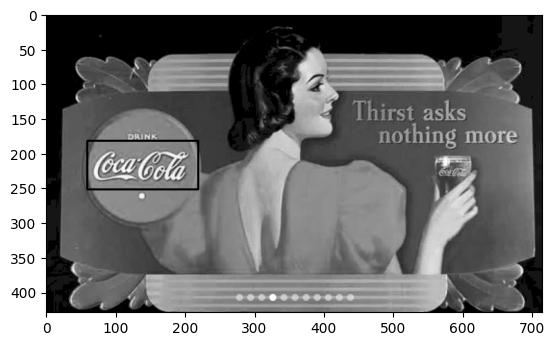

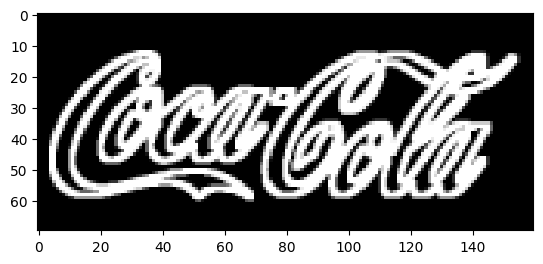

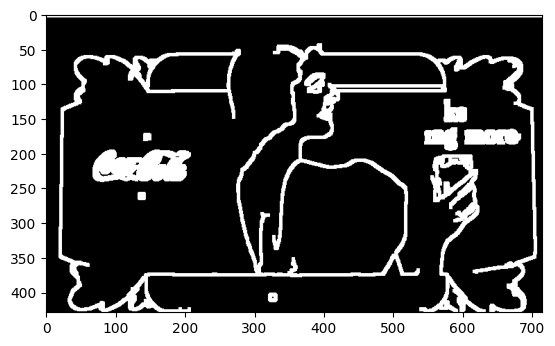

(1389, 1389)
(0.60750412940979, (412, 484), 0.4, 0.4)


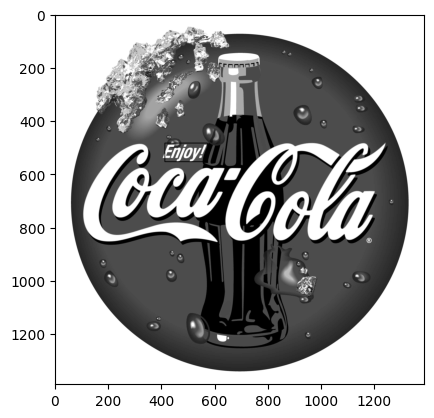

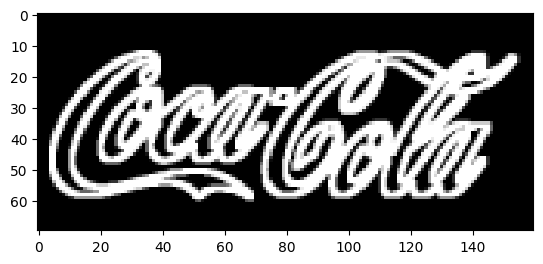

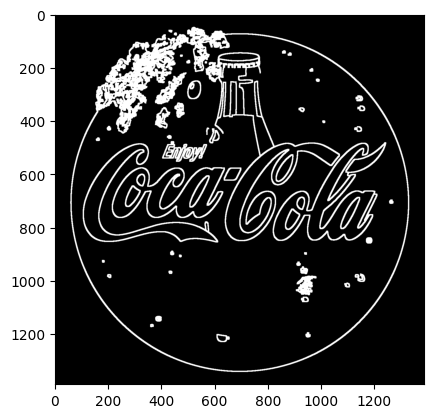

(450, 687)
(0.5827888250350952, (195, 188), 0.7555555555555555, 0.7555555555555555)


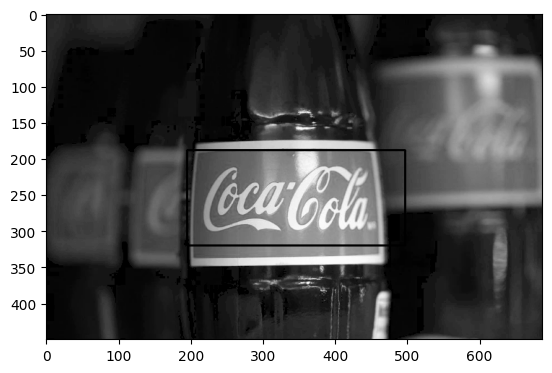

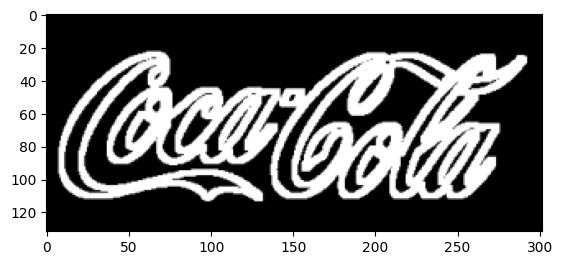

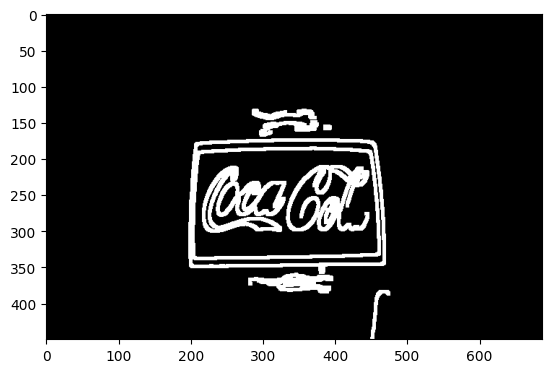

In [243]:
# Template matching
images_path = "TP3\images"
template_path = "TP3\\template"

paths = ('\coca_logo_1.png', '\coca_logo_2.png', '\coca_multi.png', '\coca_retro_1.png', '\coca_retro_2.png', '\COCA-COLA-LOGO.jpg', '\logo_1.png')

for image in paths:
    img = cv.imread(images_path + image, cv.IMREAD_GRAYSCALE)
    match_logo(img, 0.4)


(0.3496651351451874, (28, 193), 0.43793103448275866, 0.4758620689655173)


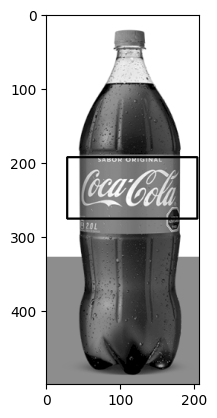

(0.41087621450424194, (13, 110), 0.5137931034482759, 0.6275862068965518)


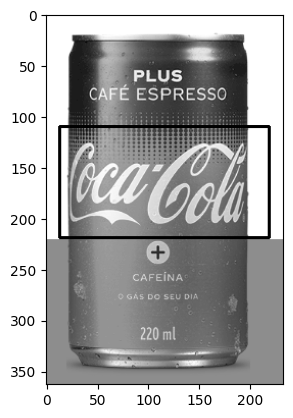

(0.5587471723556519, (615, 141), 0.4, 0.4758620689655173)


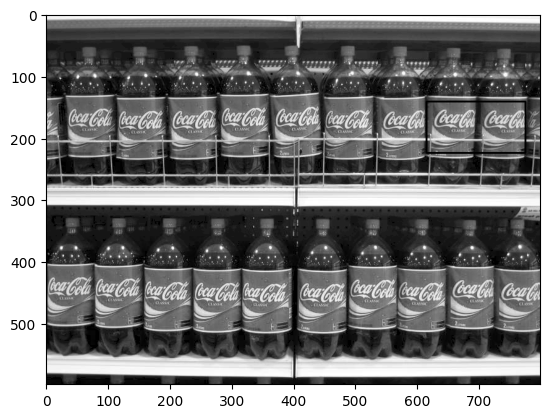

(0.47231441736221313, (471, 313), 0.5137931034482759, 0.5137931034482759)


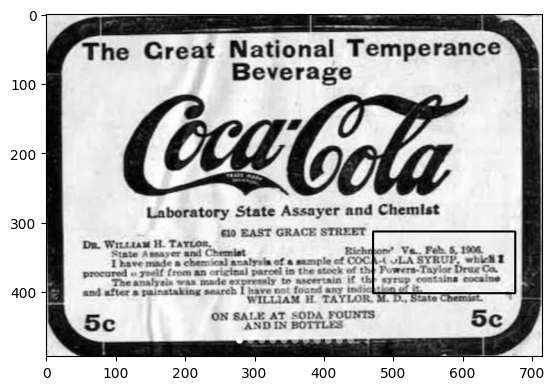

(0.2189740538597107, (60, 182), 0.4, 0.4)


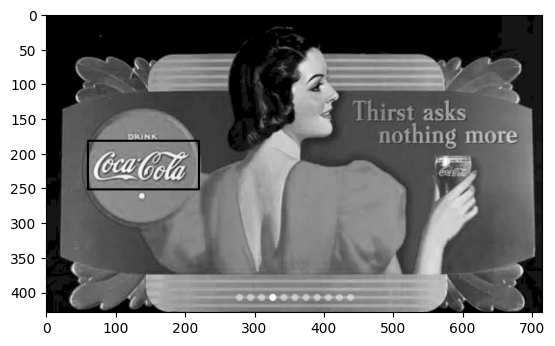

(0.44834157824516296, (402, 470), 0.43793103448275866, 0.5137931034482759)


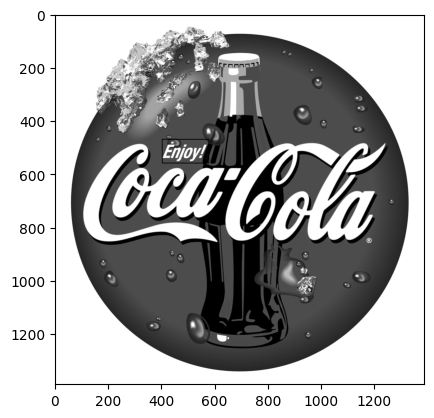

(0.5499358177185059, (254, 202), 0.5137931034482759, 0.6275862068965518)


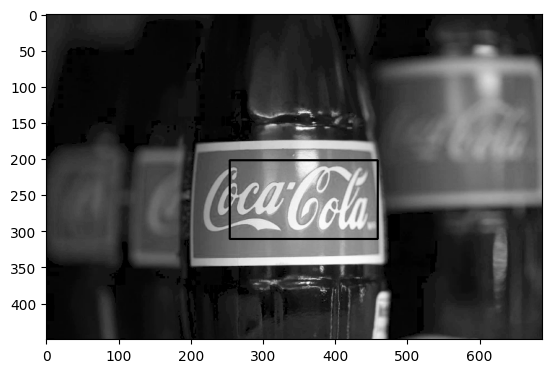

In [128]:
# Template matching
images_path = "TP3\images"
template_path = "TP3\\template"

paths = ('\coca_logo_1.png', '\coca_logo_2.png', '\coca_multi.png', '\coca_retro_1.png', '\coca_retro_2.png', '\COCA-COLA-LOGO.jpg', '\logo_1.png')

for image in paths:
    img = cv.imread(images_path + image, cv.IMREAD_GRAYSCALE)
    match_1_coke_logo(img, 0.4)

(0.2189740538597107, (60, 182), 0.4, 0.4)


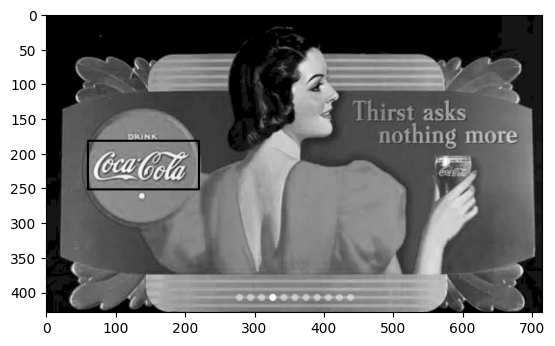

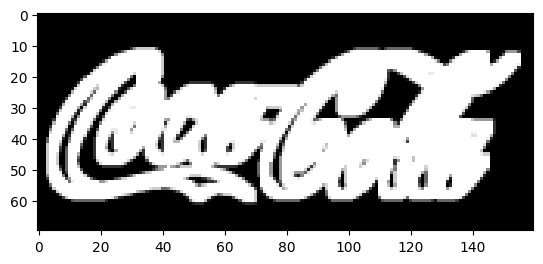

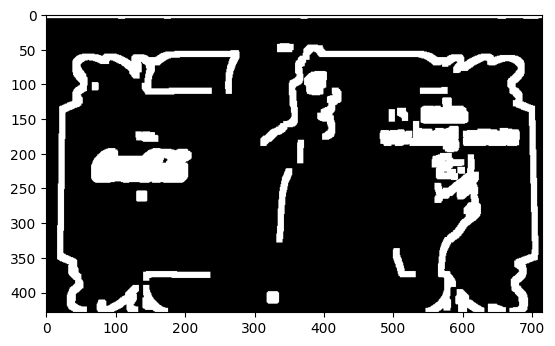

In [46]:
# Template matching
images_path = "TP3\images"
template_path = "TP3\\template"

path_img = images_path + '\coca_retro_2.png'
img = cv.imread(path_img, cv.IMREAD_GRAYSCALE)

match_1_coke_logo(img, 0.4)

(0.3496651351451874, (28, 193), 0.43793103448275866, 0.4758620689655173)


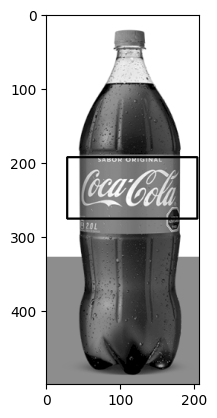

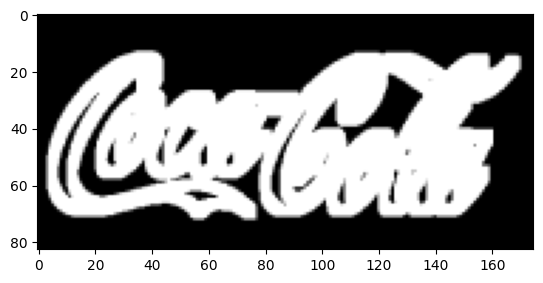

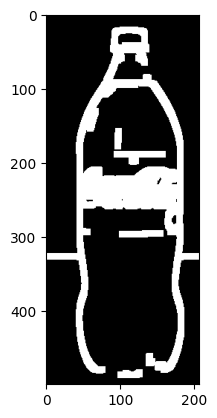

In [45]:
# Template matching
images_path = "TP3\images"
template_path = "TP3\\template"

path_img = images_path + '\coca_logo_1.png'
img = cv.imread(path_img, cv.IMREAD_GRAYSCALE)

match_1_coke_logo(img, 0.4)

(0.41087621450424194, (13, 110), 0.5137931034482759, 0.6275862068965518)


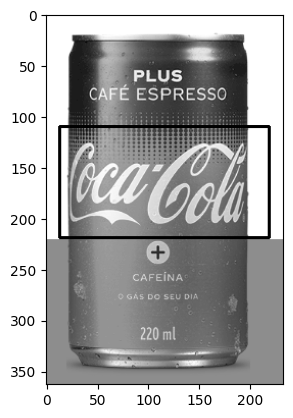

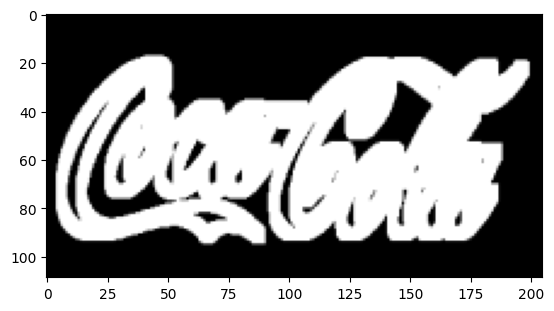

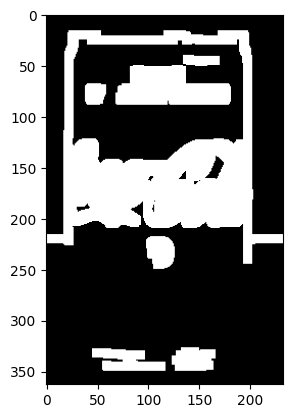

In [44]:
# Template matching
images_path = "TP3\images"
template_path = "TP3\\template"

path_img = images_path + '\coca_logo_2.png'
img = cv.imread(path_img, cv.IMREAD_GRAYSCALE)

match_1_coke_logo(img, 0.4)

(0.5499358177185059, (254, 202), 0.5137931034482759, 0.6275862068965518)


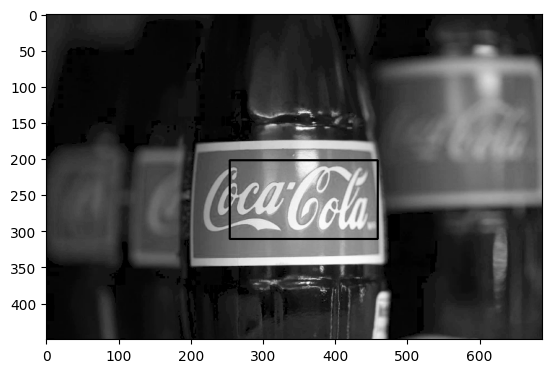

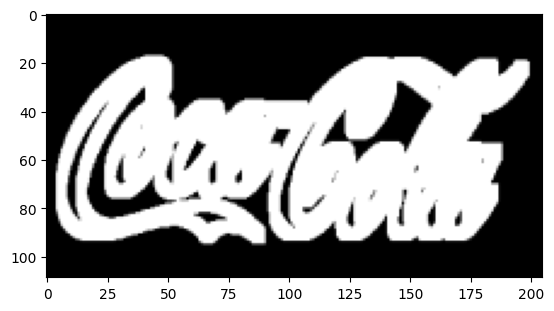

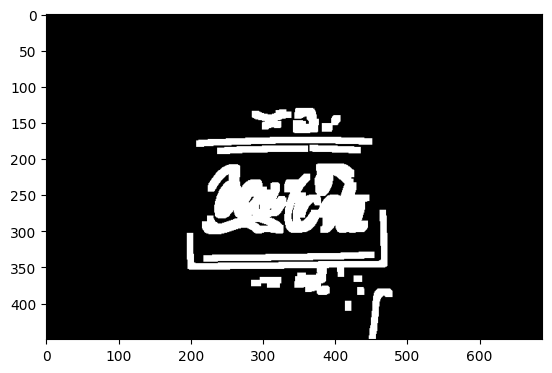

In [48]:
# Template matching
images_path = "TP3\images"
template_path = "TP3\\template"

path_img = images_path + '\logo_1.png'
img = cv.imread(path_img, cv.IMREAD_GRAYSCALE)

match_1_coke_logo(img, 0.4)

Al intentar generalizar, se ve como la escala de ajuste del template termina afectando mucho el desempeño del algoritmo.
Si se comienza con una escala muy pequeña en una imagen, el algoritmo encuentra incorrectamente el logo en la imagen.

PARTE 2

(0.4283876419067383, (105, 144), 0.24482758620689657, 0.2896551724137931)


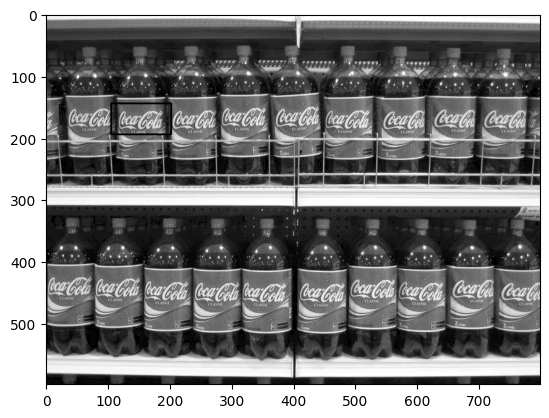

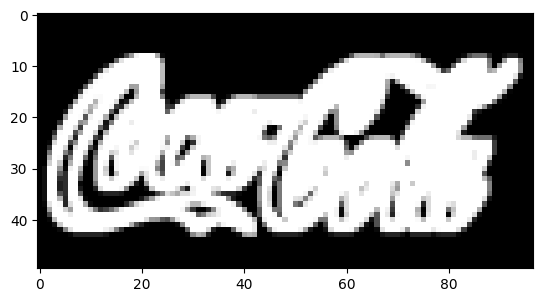

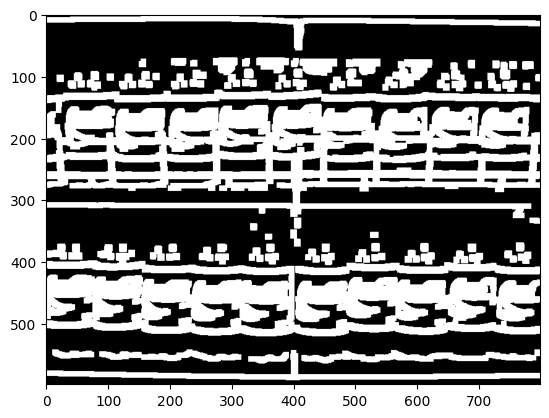

In [36]:
# Template matching
images_path = "TP3\images"
template_path = "TP3\\template"

path_img = images_path + '\coca_multi.png'
img = cv.imread(path_img, cv.IMREAD_GRAYSCALE)

match_1_coke_logo(img, 0.2)

In [37]:
#Funcion para matchear 1 imagen
def match_multiple_coke_logo(input_image:np.ndarray, starting_scale, threshold):
    #cargo template
    template_path = "TP3\\template"
    path_template = template_path + '\pattern.png'
    template_in = cv.imread(path_template, cv.IMREAD_GRAYSCALE)

    template_filtered = template_in.copy()
    image_filtered = input_image.copy()

    #Aplico filtros
    image_filtered = cv.GaussianBlur(image_filtered, ksize = (3, 3), sigmaX = 1)
    #template_filtered = cv.GaussianBlur(template_filtered, ksize = (3, 3), sigmaX = 1)

    image_filtered = cv.Canny(image_filtered, 200,250, L2gradient = True)
    template_filtered = cv.Canny(template_filtered, 200, 240, L2gradient = True)

    kernel = np.ones((5,5),np.uint8)

    image_filtered = cv.dilate(image_filtered,kernel,iterations = 1)
    template_filtered = cv.dilate(template_filtered,kernel,iterations = 1)

    #Hago el matching con escala variable
    height, width = template_filtered.shape
    found = None
    loc = None
    for scale_x in np.linspace(starting_scale, 1.5, 30):
        for scale_y in np.linspace(starting_scale, 1.5, 30):
            dim = (int(width * scale_x), int(height * scale_y))
            resized = cv.resize(template_filtered, dim, interpolation = cv.INTER_AREA)

            if resized.shape[0] > image_filtered.shape[0] or resized.shape[1] > image_filtered.shape[1]:
                #print("Template larger than image")
                break

            if(scale_x / scale_y > 1.3 or scale_x / scale_y < 0.8):
                break            

            result = cv.matchTemplate(image_filtered, resized, cv.TM_CCOEFF_NORMED)
            (min_val, max_val, min_loc, max_loc) = cv.minMaxLoc(result)

            if found is None or max_val > found[0]:
                loc = np.where( result >= threshold)
                found = (max_val, max_loc, scale_x, scale_y)
                copy1 = resized.copy()
                copy2 = image_filtered.copy()

    copy = input_image.copy()

    for pt in zip(*loc[::-1]):
        cv.rectangle(copy, pt, (pt[0] + int(width * scale_x), pt[1] + int(height * scale_y)), (0,0,255), 2)

    print(found)
    plt.figure()
    plt.imshow(copy, cmap = 'gray')
    plt.show()  

    plt.figure()
    plt.imshow(copy1, cmap = 'gray')
    plt.show()

    plt.figure()
    plt.imshow(copy2, cmap = 'gray')
    plt.show()

(0.5592507123947144, (103, 145), 0.24482758620689657, 0.2896551724137931)


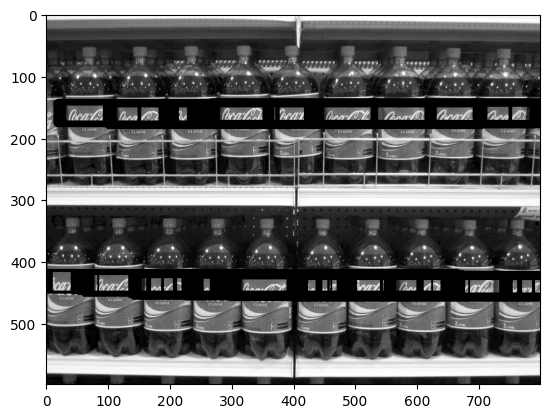

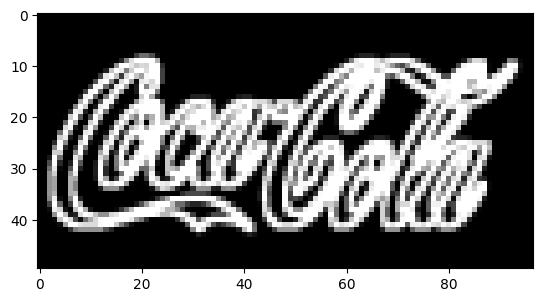

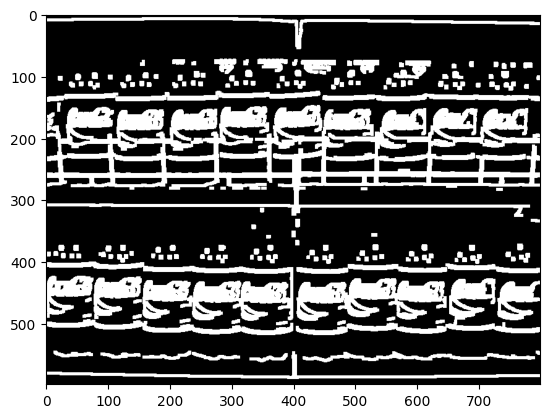

In [38]:
# Template matching
images_path = "TP3\images"
template_path = "TP3\\template"

path_img = images_path + '\coca_multi.png'
img = cv.imread(path_img, cv.IMREAD_GRAYSCALE)

match_multiple_coke_logo(img, 0.2, 0.35)

PARTE 3

(0.580099880695343, (35, 197), 0.3896551724137931, 0.4293103448275862)


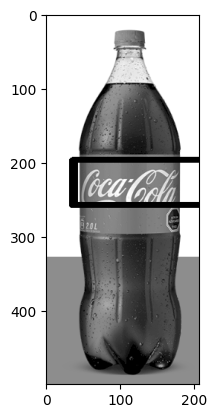

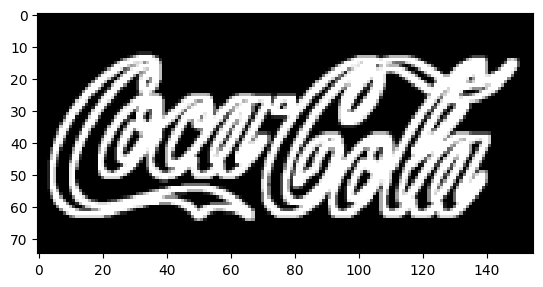

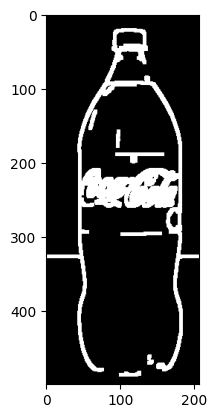

In [39]:
# Template matching
images_path = "TP3\images"
template_path = "TP3\\template"

path_img = images_path + '\coca_logo_1.png'
img = cv.imread(path_img, cv.IMREAD_GRAYSCALE)

match_multiple_coke_logo(img, 0.35, 0.5)

(0.5436610579490662, (0, 103), 0.5689655172413793, 0.7068965517241379)


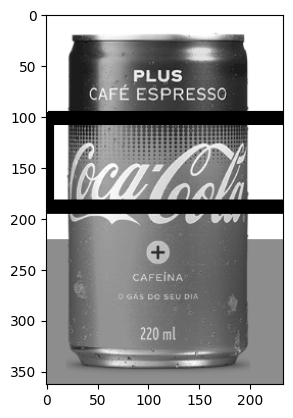

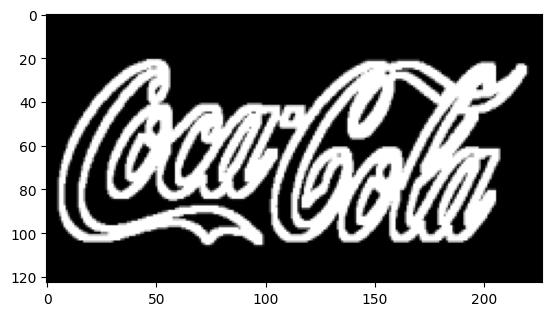

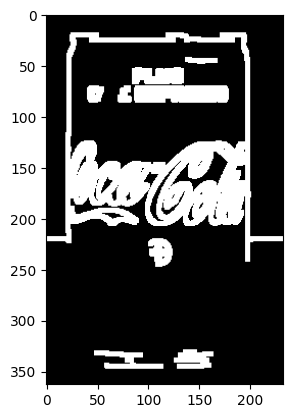

In [40]:
# Template matching
images_path = "TP3\images"
template_path = "TP3\\template"

path_img = images_path + '\coca_logo_2.png'
img = cv.imread(path_img, cv.IMREAD_GRAYSCALE)

match_multiple_coke_logo(img, 0.5, 0.4)